In genomics, it is common to use mRNA expression data to find clusters of similarly expressed genes to help understand their function. One very robust clustering algorithm is known as the k-means clustering algorithm. This algorithm takes as input the number of clusters to find, k, and the input data. The input data can be multidimensional data, but let’s first consider gene expression data in three tissues, so each gene has three coordinates describing its normalized expression level in each tissue: x,y, and z. The kmeans algorithm is defined as follows:

In [45]:
from random import randrange
from math import sqrt
import time

class Mean:
    """Object Mean"""
    
    def __init__(self, mean, close_coords):
        """Object Constructor for Mean. Creates a Mean"""
        self.mean = mean
        self.close_coords = close_coords
    
    def getMean(self):
        """Returns the mean"""
        return self.mean

    def getCloseCoords(self):
        """Returns a list of the closest coordinates"""
        return self.close_coords

    def setMean(self, mean):
        """Sets the mean"""
        self.mean = mean

    def appendCloseCoords(self, coordinates):
        """appends a coordinate to the list of closest coordinates of a mean"""
        self.close_coords.append(coordinates)

    def setCloseCoords(self, close_coords):
        """Sets the closest coordinates"""
        self.close_coords = close_coords

    def __str__(self):
        """Prints out Mean with Closest Coords"""
        return 'Mean: {0}\nClosest Coordinates: {1}'.format(self.mean, self.close_coords)


In [14]:
def L2Distance(coordinates, mean):
    return math.sqrt(sum((coordinates[i]-mean[i])**2 for i in range(len(coordinates))))

In [43]:
import numpy as np
import random, math
data_matrix = np.loadtxt("clusters.dat")
numPoints = len(data_matrix)
k = 3

init_means = data_matrix[random.sample(range(numPoints), 3)]
init_means = [Mean(mean, []) for mean in init_means]
curr_means = init_means

[<__main__.Mean instance at 0x10a671320>,
 <__main__.Mean instance at 0x10a6713b0>,
 <__main__.Mean instance at 0x10a671248>]

In [47]:
for i in range(10):
    print "Iteration: ", i
    time.sleep(2)

    for coord in data_matrix:
        distance_list = [L2Distance(coord, mean.getMean()) for mean in curr_means]
        curr_means[distance_list.index(min(distance_list))].appendCloseCoords(coord)

    for mean in curr_means:
        closest_coords_matrix = np.array(mean.getCloseCoords())

        if (closest_coords_matrix.shape[0] == 0):
            continue
        else:
            mean.setMean([np.mean(closest_coords_matrix[:, dim_i]) for dim_i in range(closest_coords_matrix.shape[1])])

        print mean.getMean()
        mean.setCloseCoords([])

Iteration:  0
[0.69655032886792456, 0.9686423281132075, 0.23912838358490565]
[0.94000469488888905, 0.87820132177777788, 0.061833950211111113]
[0.092940834633725489, 0.18055845819901964, 0.34174784073529407]
Iteration:  1
[0.69655032886792456, 0.9686423281132075, 0.23912838358490565]
[0.94000469488888905, 0.87820132177777788, 0.061833950211111113]
[0.092940834633725489, 0.18055845819901964, 0.34174784073529407]
Iteration:  2
[0.69655032886792456, 0.9686423281132075, 0.23912838358490565]
[0.94000469488888905, 0.87820132177777788, 0.061833950211111113]
[0.092940834633725489, 0.18055845819901964, 0.34174784073529407]
Iteration:  3
[0.69655032886792456, 0.9686423281132075, 0.23912838358490565]
[0.94000469488888905, 0.87820132177777788, 0.061833950211111113]
[0.092940834633725489, 0.18055845819901964, 0.34174784073529407]
Iteration:  4
[0.69655032886792456, 0.9686423281132075, 0.23912838358490565]
[0.94000469488888905, 0.87820132177777788, 0.061833950211111113]
[0.092940834633725489, 0.18055

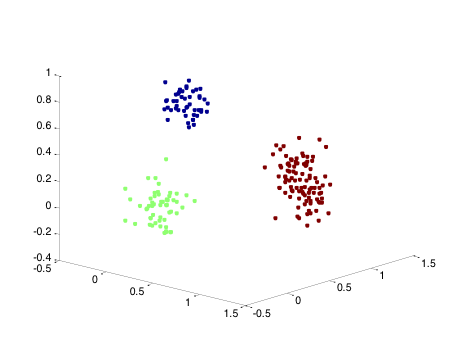

In [1]:
from IPython.display import Image
Image("K=3.png")